In [1]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import EpiClockNBL.src.util as nbl_util
nbl_consts = nbl_util.consts
import EpiClockNBL.Select_fCpGs.util as local_util
import EpiClockNBL.src.maxima as maxima

In [2]:
proj_dir = os.path.join(nbl_consts['official_indir'], 'TARGET')

In [3]:
figure_outdir = 'figures'
os.makedirs(figure_outdir, exist_ok=True)

In [4]:
c_beta = pd.read_table(os.path.join(proj_dir, 'NBL.c_beta.txt'), index_col=0, header=None).squeeze('columns')
# c_beta_traditional = pd.read_table(os.path.join(proj_dir, 'NBL.c_beta.traditional.txt'), index_col=0, header=None).squeeze('columns')
LUMP_purity = pd.read_table(os.path.join(proj_dir, 'LUMP_purity.txt'), index_col=0, header=None).squeeze('columns')

# Read good_mean_tumors from the text file
with open(os.path.join(nbl_consts['repo_dir'], "data", "good_mean_tumors.txt"), "r") as f:
    good_mean_tumors = [line.strip() for line in f]  # Strip newlines and spaces

In [5]:
# Import clinical table
# clinical = pd.read_table(
#     os.path.join(proj_dir, 'cohort1.clinical.tsv')
# )
# clinical = clinical.set_index('submitter_id')

# sampleIDs = c_beta.index.values
# patient_to_sample_IDs = pd.Series(data=sampleIDs, index=[nbl_util.sampleToPatientID(x) for x in sampleIDs]).rename('sampleID')
# clinical = clinical.merge(patient_to_sample_IDs, left_index=True, right_index=True, how='left')

# clinical = clinical.merge(c_beta.rename('c_beta'), left_on='sampleID', right_index=True)

# # Import Clock beta values for TCGA
# beta_values_Clock = pd.read_table(os.path.join(proj_dir, 'NBL.methyl.antiNonIterClustNotStuck_sites.tsv'),
#                       index_col=0).rename(columns=nbl_util.sampleToPatientID)

# clinical['c_beta'] = 1 - beta_values_Clock.std()

# clinical = clinical.merge(LUMP_purity.rename('LUMP'), left_on='sampleID', right_index=True)

# # Process certain columns
# clinical['Age'] = clinical['age_at_diagnosis'] / 365

# clinical.to_csv(os.path.join(proj_dir, 'clinical.annotated.tsv'), sep='\t')

In [6]:
clinical = pd.read_table(os.path.join(proj_dir, 'clinical.annotated.tsv'), index_col=0)

clinical = clinical.loc[good_mean_tumors]

display(clinical)

,project,disease_type,primary_site,submitter_id.1,inss_stage,days_to_diagnosis,created_datetime,treatments,last_known_disease_status,tissue_or_organ_of_origin,...,sampleID,c_beta,LUMP,Age,gmm_X,gmm_phi,psi_1_mean,psi_2_mean,psi_3_mean,psi_sub
submitter_id,,,,,,,,,,,,,,,,,,,,,
TARGET-30-PAIFXV,TARGET-NBL,Neuroepitheliomatous Neoplasms,Unknown,TARGET-30-PAIFXV,Stage 4,0.0,2016-04-25T16:33:09.408838-05:00,"c(\9341\"", \""9342\"", \""9047\"", \""P9462\"", \""93...",NaN,Unknown,...,TARGET-30-PAIFXV-01A,0.849554,0.737149,5.490411,0.353410,0.616801,0.201507,0.446211,0.352282,0.150775
TARGET-30-PAISNS,TARGET-NBL,Neuroepitheliomatous Neoplasms,Unknown,TARGET-30-PAISNS,Stage 4,0.0,2016-04-25T16:33:19.670885-05:00,"c(\P9462\"", \""9047\""), c(\""2024-03-13T17:13:56...",NaN,Unknown,...,TARGET-30-PAISNS-01A,0.780827,0.843666,2.931507,0.238432,0.324116,0.228090,0.429734,0.342177,0.114087
TARGET-30-PAITCI,TARGET-NBL,Neuroepitheliomatous Neoplasms,Unknown,TARGET-30-PAITCI,Stage 4,0.0,2016-04-25T16:33:20.766209-05:00,"c(\9082\"", \""9047\""), c(\""2024-03-13T17:13:56....",NaN,Unknown,...,TARGET-30-PAITCI-01A,0.806653,0.828741,1.994521,0.286813,0.426599,0.220536,0.351632,0.427832,0.207296
TARGET-30-PAIVHE,TARGET-NBL,Neuroepitheliomatous Neoplasms,Adrenal gland,TARGET-30-PAIVHE,Stage 4,0.0,2016-04-25T16:33:24.712904-05:00,"c(\9047\"", \""P9462\"", \""ANBL0321\""), c(\""2024-...",NaN,"Adrenal gland, NOS",...,TARGET-30-PAIVHE-01A,0.833854,0.802889,3.076712,0.316642,0.502432,0.183058,0.375171,0.441771,0.258713
TARGET-30-PAIVMJ,TARGET-NBL,Neuroepitheliomatous Neoplasms,Unknown,TARGET-30-PAIVMJ,Stage 1,0.0,2016-04-25T16:33:25.255816-05:00,"9047, 2024-03-13T17:13:56.180548-05:00, 93551d...",NaN,Unknown,...,TARGET-30-PAIVMJ-01A,0.844823,0.810102,0.553425,0.387515,0.780158,0.133737,0.546146,0.320117,0.186381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TARGET-30-PATDXC,TARGET-NBL,Neuroepitheliomatous Neoplasms,Retroperitoneum and peritoneum,TARGET-30-PATDXC,Stage 4,0.0,2016-04-25T17:09:48.760969-05:00,"c(\ANBL0931\"", \""ANBL00B1\""), c(\""2024-03-13T1...",NaN,Retroperitoneum,...,TARGET-30-PATDXC-01A,0.845110,0.631937,4.545205,0.331997,0.549718,0.186876,0.520173,0.292951,0.106074
TARGET-30-PATEPF,TARGET-NBL,Neuroepitheliomatous Neoplasms,Adrenal gland,TARGET-30-PATEPF,Stage 4,0.0,2016-04-25T17:10:13.370406-05:00,"ANBL00B1, 2024-03-13T17:13:56.180548-05:00, 50...",NaN,"Adrenal gland, NOS",...,TARGET-30-PATEPF-01A,0.765816,0.772190,3.928767,0.222938,0.295313,0.262253,0.422339,0.315408,0.053155
TARGET-30-PATNKP,TARGET-NBL,Neuroepitheliomatous Neoplasms,Retroperitoneum and peritoneum,TARGET-30-PATNKP,Stage 4,0.0,2016-04-25T17:16:54.546442-05:00,"c(\ANBL0931\"", \""ADVL0912\"", \""ANBL0532\"", \""A...",NaN,Retroperitoneum,...,TARGET-30-PATNKP-01A,0.759995,0.882555,9.441096,0.220374,0.290687,0.252104,0.382823,0.365074,0.112970


In [7]:
## Configure graph
sf = 1
figsize = np.array([7, 6])
sns.set(rc={"savefig.bbox":'tight', 'axes.linewidth':sf}, font_scale=1, style='ticks')

clinical.name = 'TARGET-NBL'

(array([1., 1., 1., 1., 1., 1., 3., 0., 0., 1.]),
 array([0.74371565, 0.74812087, 0.75252609, 0.75693131, 0.76133653,
        0.76574175, 0.77014697, 0.77455219, 0.77895741, 0.78336263,
        0.78776785]),
 <BarContainer object of 10 artists>)

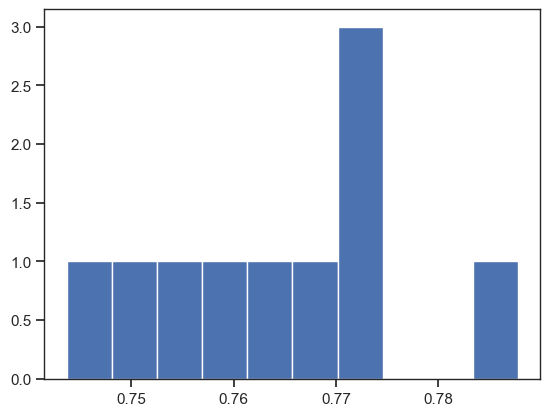

In [8]:
plt.hist(clinical.loc[clinical['sampleID'].isin(['TARGET-30-PAPVFD-01A', 'TARGET-30-PANUKV-01A', 'TARGET-30-PANLET-01A',
       'TARGET-30-PASCUF-01A', 'TARGET-30-PARDYU-01A', 'TARGET-30-PAPKXS-01A',
       'TARGET-30-PASMNT-01A', 'TARGET-30-PATEPF-01A', 'TARGET-30-PANBMJ-01A',
       'TARGET-30-PALHVD-01A', 'TARGET-30-PATDWN-01A', 'TARGET-30-PATNKP-01A',
       'TARGET-30-PARETE-01A', 'TARGET-30-PALSAE-01A']),'c_beta'])

# $c_\beta$ distribution

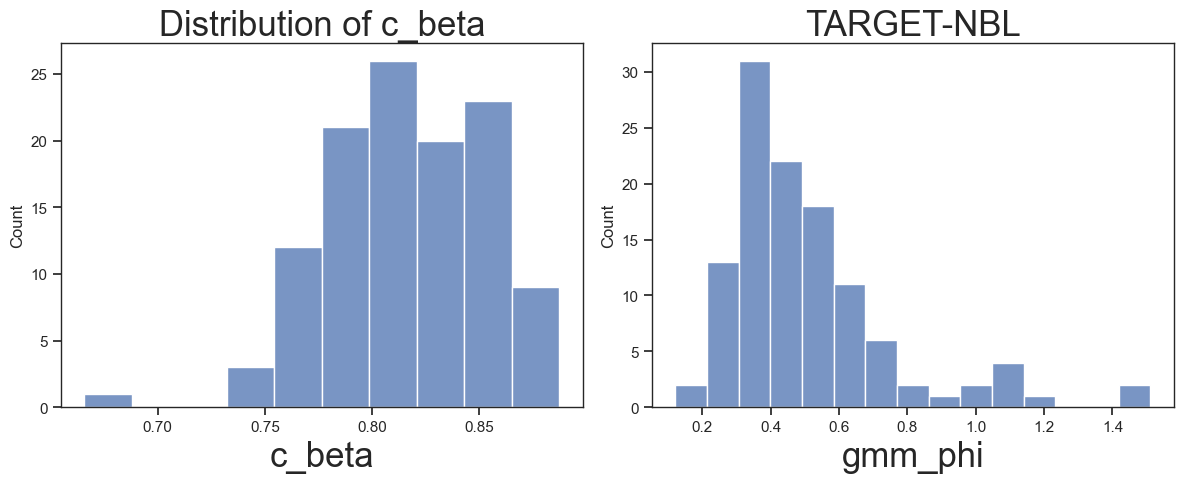

In [10]:
sf = 1

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for c_beta (Left)
sns.histplot(ax=axes[0], x=clinical['c_beta'])
axes[0].set_xlabel('c_beta', fontsize=nbl_consts['labelfontsize'] * sf)
axes[0].set_title('Distribution of c_beta', fontsize=nbl_consts['labelfontsize'] * sf)

# Histogram for gmm_phi (Right)
sns.histplot(ax=axes[1], x=clinical['gmm_phi'])
axes[1].set_xlabel('gmm_phi', fontsize=nbl_consts['labelfontsize'] * sf)
axes[1].set_title('TARGET-NBL', fontsize=nbl_consts['labelfontsize'] * sf)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# Covariate Analysis

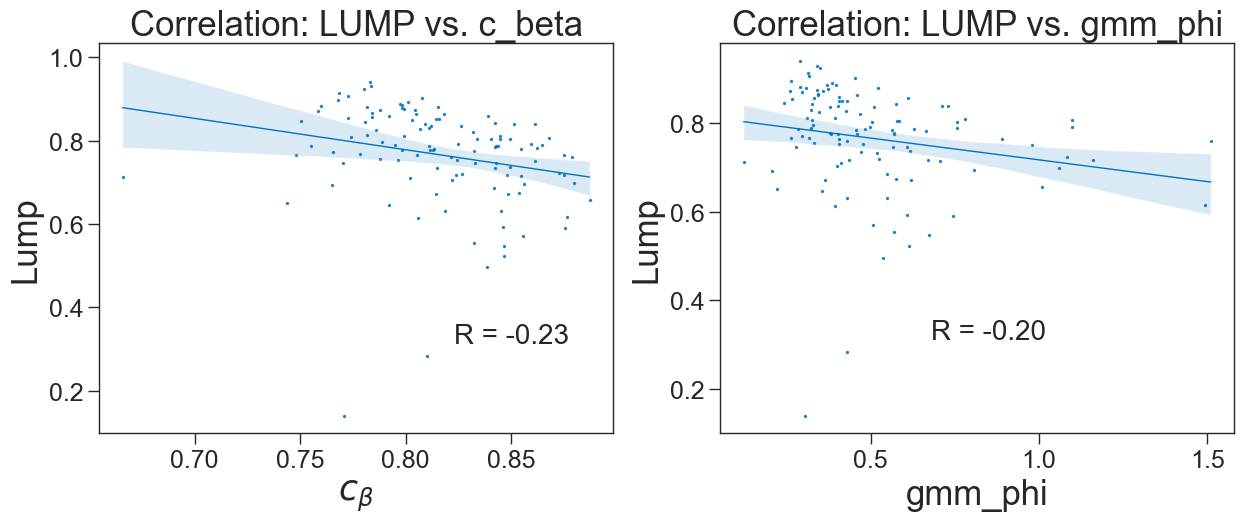

In [11]:
fig, axes = plt.subplots(1, 2, figsize=figsize * (2, 1) * 0.9)  # Side-by-side plots

# Left plot: c_beta vs. LUMP
nbl_util.saveCorrelationPlot(clinical, var_y='LUMP', restrict=True,
                            var_x='c_beta',
                            outfile=False, text_x=0.85, text_y=0.3,
                            figsize=figsize * 0.9, labelfontsize=nbl_consts['labelfontsize'],
                            ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, s=2,
                            color=nbl_consts['palette_jco'][0], line_kws={'linewidth':1 * sf},
                            ax=axes[0])  # Assign subplot

axes[0].set_title("Correlation: LUMP vs. c_beta", fontsize=nbl_consts['labelfontsize'])

# Right plot: gmm_phi vs. LUMP
nbl_util.saveCorrelationPlot(clinical, var_y='LUMP', restrict=True,
                            var_x='gmm_phi',
                            outfile=False, text_x=0.85, text_y=0.3,
                            figsize=figsize * 0.9, labelfontsize=nbl_consts['labelfontsize'],
                            ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, s=2,
                            color=nbl_consts['palette_jco'][0], line_kws={'linewidth':1 * sf},
                            ax=axes[1])  # Assign subplot

axes[1].set_title("Correlation: LUMP vs. gmm_phi", fontsize=nbl_consts['labelfontsize'])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [12]:
nbl_util.getCorrelation(clinical, 'LUMP', 'gmm_phi')

LinregressResult(slope=np.float64(-0.09819209544723106), intercept=np.float64(0.8158067808047047), rvalue=np.float64(-0.2034252213186708), pvalue=np.float64(0.029219327628879677), stderr=np.float64(0.044458554640045035), intercept_stderr=np.float64(0.02505720702288324))

In [13]:
nbl_util.getCorrelation(clinical, 'LUMP', 'gmm_phi', use_samples=clinical.index[clinical['gmm_phi'] > 0.5])

LinregressResult(slope=np.float64(-0.0002236073704484938), intercept=np.float64(0.727496526673126), rvalue=np.float64(-0.0005814329488384488), pvalue=np.float64(0.9969401675865908), stderr=np.float64(0.057977577345708395), intercept_stderr=np.float64(0.04463022121792334))

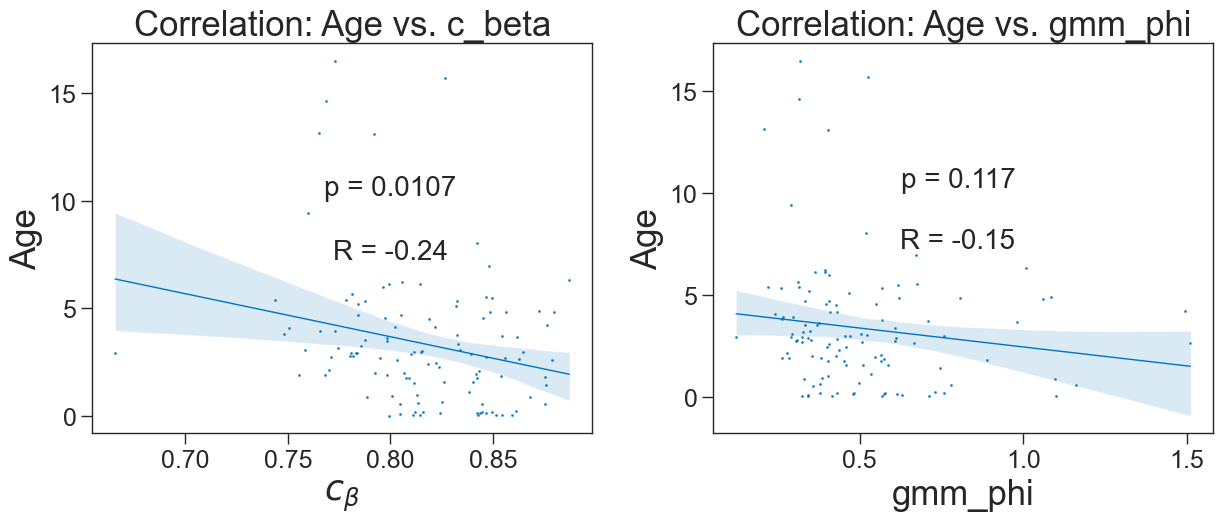

In [15]:
# Compute Pearson correlations
corr_c_beta, p_value_c_beta = stats.pearsonr(clinical['c_beta'], clinical['Age'])
corr_gmm_phi, p_value_gmm_phi = stats.pearsonr(clinical['gmm_phi'], clinical['Age'])

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(figsize[0] * 2 * 0.9, figsize[1] * 0.9))

# Left plot: c_beta vs. Age
nbl_util.saveCorrelationPlot(clinical, var_y='Age', restrict=True,
                            var_x='c_beta', outfile=False,
                            text_x=0.8, text_y=7,
                            ax=axes[0],  # Assign subplot
                            figsize=figsize * 0.9, labelfontsize=nbl_consts['labelfontsize'], 
                            ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, s=1,
                            color=nbl_consts['palette_jco'][0], 
                            line_kws={'linewidth': 1 * sf})

axes[0].set_title("Correlation: Age vs. c_beta", fontsize=nbl_consts['labelfontsize'])
axes[0].text(0.8, 10, f'p = {p_value_c_beta:.3g}', ha="center", va="bottom",
             fontfamily='sans-serif', fontsize=0.8 * nbl_consts['labelfontsize'] * sf)

# Right plot: gmm_phi vs. Age
nbl_util.saveCorrelationPlot(clinical, var_y='Age', restrict=True,
                            var_x='gmm_phi', outfile=False,
                            text_x=0.8, text_y=7,
                            ax=axes[1],  # Assign subplot
                            figsize=figsize * 0.9, labelfontsize=nbl_consts['labelfontsize'], 
                            ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, s=1,
                            color=nbl_consts['palette_jco'][0], 
                            line_kws={'linewidth': 1 * sf})

axes[1].set_title("Correlation: Age vs. gmm_phi", fontsize=nbl_consts['labelfontsize'])
axes[1].text(0.8, 10, f'p = {p_value_gmm_phi:.3g}', ha="center", va="bottom",
             fontfamily='sans-serif', fontsize=0.8 * nbl_consts['labelfontsize'] * sf)

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [16]:
def getVarMeansCBeta(col):
    return clinical.groupby(col)['c_beta'].agg(['count', 'mean']).sort_values('count', ascending=False)

def getVarMeansPhi(col):
    return clinical.groupby(col)['gmm_phi'].agg(['count', 'mean']).sort_values('count', ascending=False)

In [17]:
getVarMeansCBeta('primary_site')

,count,mean
primary_site,,
Adrenal gland,55,0.818732
Other and ill-defined sites,27,0.816376
Retroperitoneum and peritoneum,12,0.807764
Unknown,7,0.821042
Kidney,4,0.778642
"Heart, mediastinum, and pleura",3,0.805656
"Connective, subcutaneous and other soft tissues",1,0.818889
Liver and intrahepatic bile ducts,1,0.879793
Lymph nodes,1,0.826560


In [18]:
getVarMeansPhi('primary_site')

,count,mean
primary_site,,
Adrenal gland,55,0.516137
Other and ill-defined sites,27,0.529574
Retroperitoneum and peritoneum,12,0.446586
Unknown,7,0.523736
Kidney,4,0.326386
"Heart, mediastinum, and pleura",3,0.403028
"Connective, subcutaneous and other soft tissues",1,0.428506
Liver and intrahepatic bile ducts,1,1.059157
Lymph nodes,1,0.524286


/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns

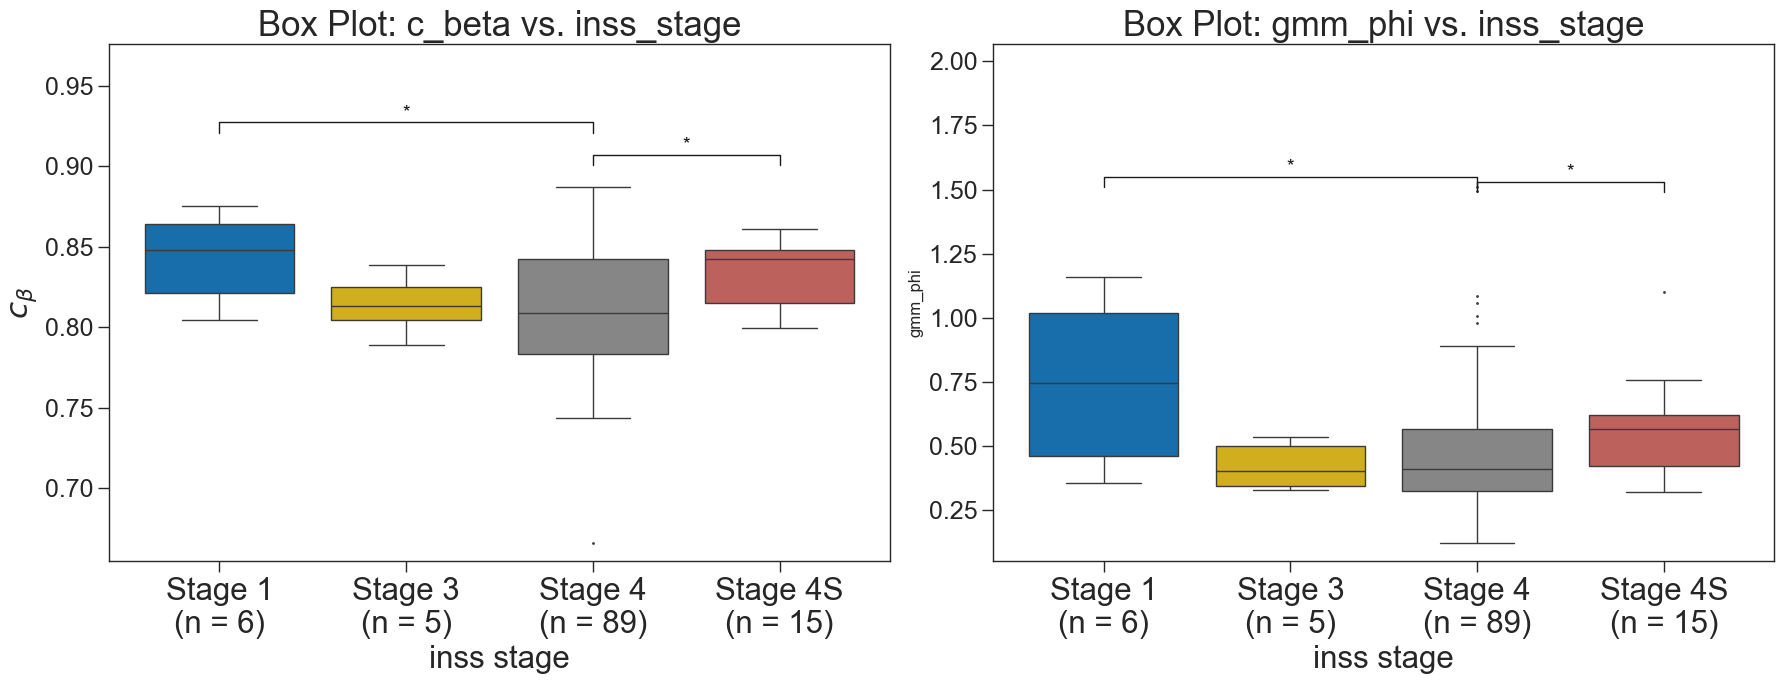

In [19]:
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(9 * 2, 7))  # Doubled width for side-by-side plots

# Left plot: c_beta vs. inss_stage
nbl_util.saveBoxPlotNew(clinical, 'inss_stage', restrict=False,
                       var_y='c_beta', outfile=False, title=False, signif_bar_heights=0.02,
                       palette=nbl_consts['palette_jco'], xlabel='inss stage',
                       figsize=np.array([9, 7]), labelfontsize=nbl_consts['labelfontsize'] * 0.9, 
                       ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, 
                       linewidth=nbl_consts['linewidth'], fliersize=nbl_consts['fliersize'], 
                       ax=axes[0])  # Assign subplot

axes[0].set_title("Box Plot: c_beta vs. inss_stage", fontsize=nbl_consts['labelfontsize'])

# Right plot: gmm_phi vs. inss_stage
nbl_util.saveBoxPlotNew(clinical, 'inss_stage', restrict=False,
                       var_y='gmm_phi', outfile=False, title=False, signif_bar_heights=0.02,
                       palette=nbl_consts['palette_jco'], xlabel='inss stage',
                       figsize=np.array([9, 7]), labelfontsize=nbl_consts['labelfontsize'] * 0.9, 
                       ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, 
                       linewidth=nbl_consts['linewidth'], fliersize=nbl_consts['fliersize'], 
                       ax=axes[1])  # Assign subplot

axes[1].set_title("Box Plot: gmm_phi vs. inss_stage", fontsize=nbl_consts['labelfontsize'])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns

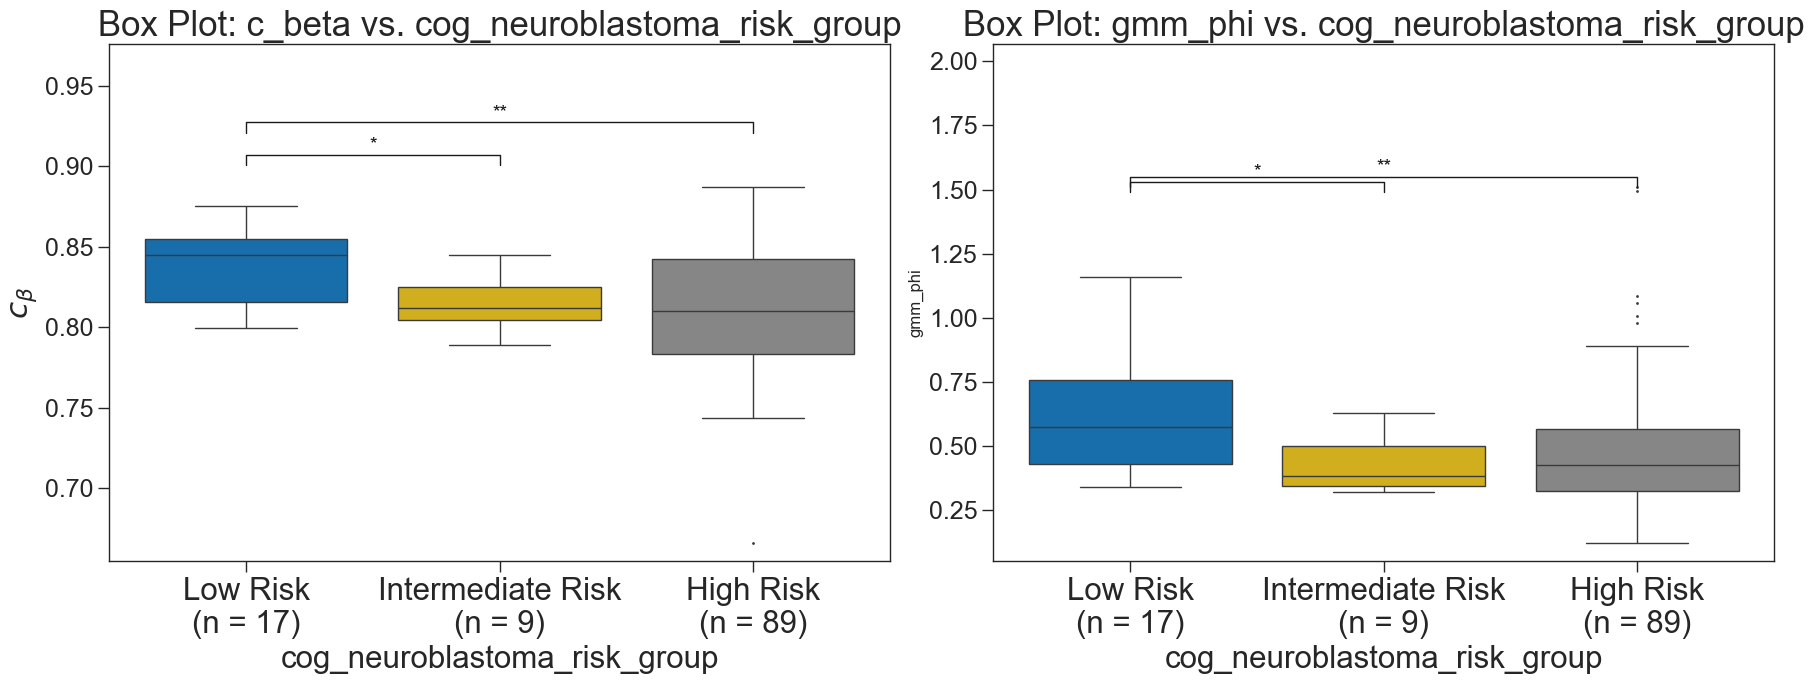

In [29]:
cat_order = ["Low Risk", "Intermediate Risk", "High Risk"]

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(9 * 2, 7))  # Doubling width for side-by-side plots

# Left plot: c_beta vs. cog_neuroblastoma_risk_group
nbl_util.saveBoxPlotNew(clinical, 'cog_neuroblastoma_risk_group', restrict=False,
                       var_y='c_beta', outfile=False, title=False, use_groups=cat_order, 
                       signif_bar_heights=0.02, palette=nbl_consts['palette_jco'], xlabel='cog_neuroblastoma_risk_group',
                       figsize=np.array([9, 7]), labelfontsize=nbl_consts['labelfontsize'] * 0.9, 
                       ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, linewidth=nbl_consts['linewidth'], 
                       fliersize=nbl_consts['fliersize'], ax=axes[0])  # Assign subplot

axes[0].set_title("Box Plot: c_beta vs. cog_neuroblastoma_risk_group", fontsize=nbl_consts['labelfontsize'])

# Right plot: gmm_phi vs. cog_neuroblastoma_risk_group
nbl_util.saveBoxPlotNew(clinical, 'cog_neuroblastoma_risk_group', restrict=False,
                       var_y='gmm_phi', outfile=False, title=False, use_groups=cat_order, 
                       signif_bar_heights=0.02, palette=nbl_consts['palette_jco'], xlabel='cog_neuroblastoma_risk_group',
                       figsize=np.array([9, 7]), labelfontsize=nbl_consts['labelfontsize'] * 0.9, 
                       ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, linewidth=nbl_consts['linewidth'], 
                       fliersize=nbl_consts['fliersize'], ax=axes[1])  # Assign subplot

axes[1].set_title("Box Plot: gmm_phi vs. cog_neuroblastoma_risk_group", fontsize=nbl_consts['labelfontsize'])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns

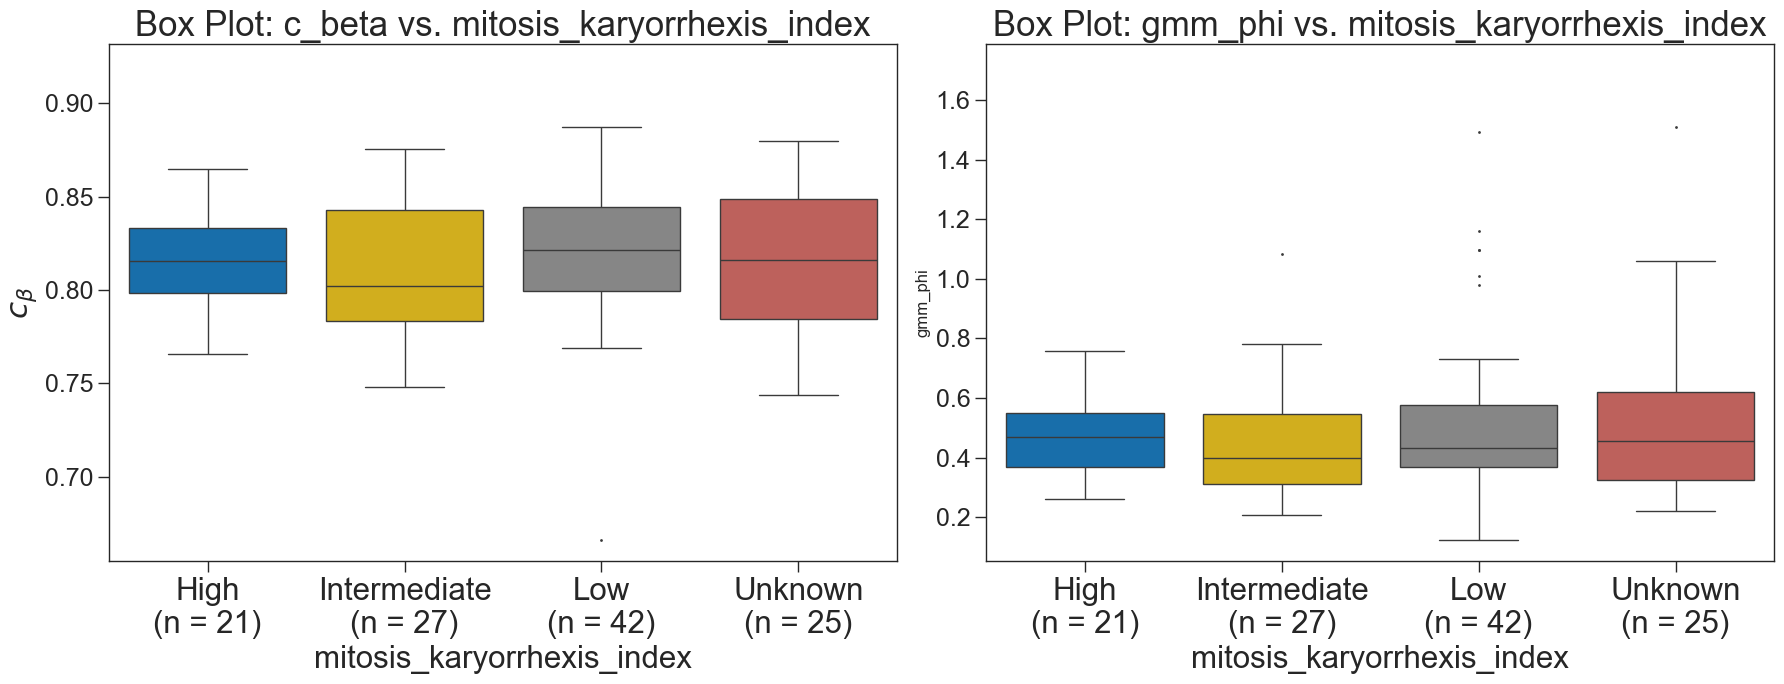

In [21]:
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(9 * 2, 7))  # Doubling width for side-by-side plots

# Left plot: c_beta vs. mitosis_karyorrhexis_index
nbl_util.saveBoxPlotNew(clinical, 'mitosis_karyorrhexis_index', restrict=False,
                       var_y='c_beta', outfile=False, title=False, signif_bar_heights=0.02,
                       palette=nbl_consts['palette_jco'], xlabel='mitosis_karyorrhexis_index',
                       figsize=np.array([9, 7]), labelfontsize=nbl_consts['labelfontsize'] * 0.9, 
                       ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, linewidth=nbl_consts['linewidth'], 
                       fliersize=nbl_consts['fliersize'], ax=axes[0])  # Assign subplot

axes[0].set_title("Box Plot: c_beta vs. mitosis_karyorrhexis_index", fontsize=nbl_consts['labelfontsize'])

# Right plot: gmm_phi vs. mitosis_karyorrhexis_index
nbl_util.saveBoxPlotNew(clinical, 'mitosis_karyorrhexis_index', restrict=False,
                       var_y='gmm_phi', outfile=False, title=False, signif_bar_heights=0.02,
                       palette=nbl_consts['palette_jco'], xlabel='mitosis_karyorrhexis_index',
                       figsize=np.array([9, 7]), labelfontsize=nbl_consts['labelfontsize'] * 0.9, 
                       ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, linewidth=nbl_consts['linewidth'], 
                       fliersize=nbl_consts['fliersize'], ax=axes[1])  # Assign subplot

axes[1].set_title("Box Plot: gmm_phi vs. mitosis_karyorrhexis_index", fontsize=nbl_consts['labelfontsize'])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns

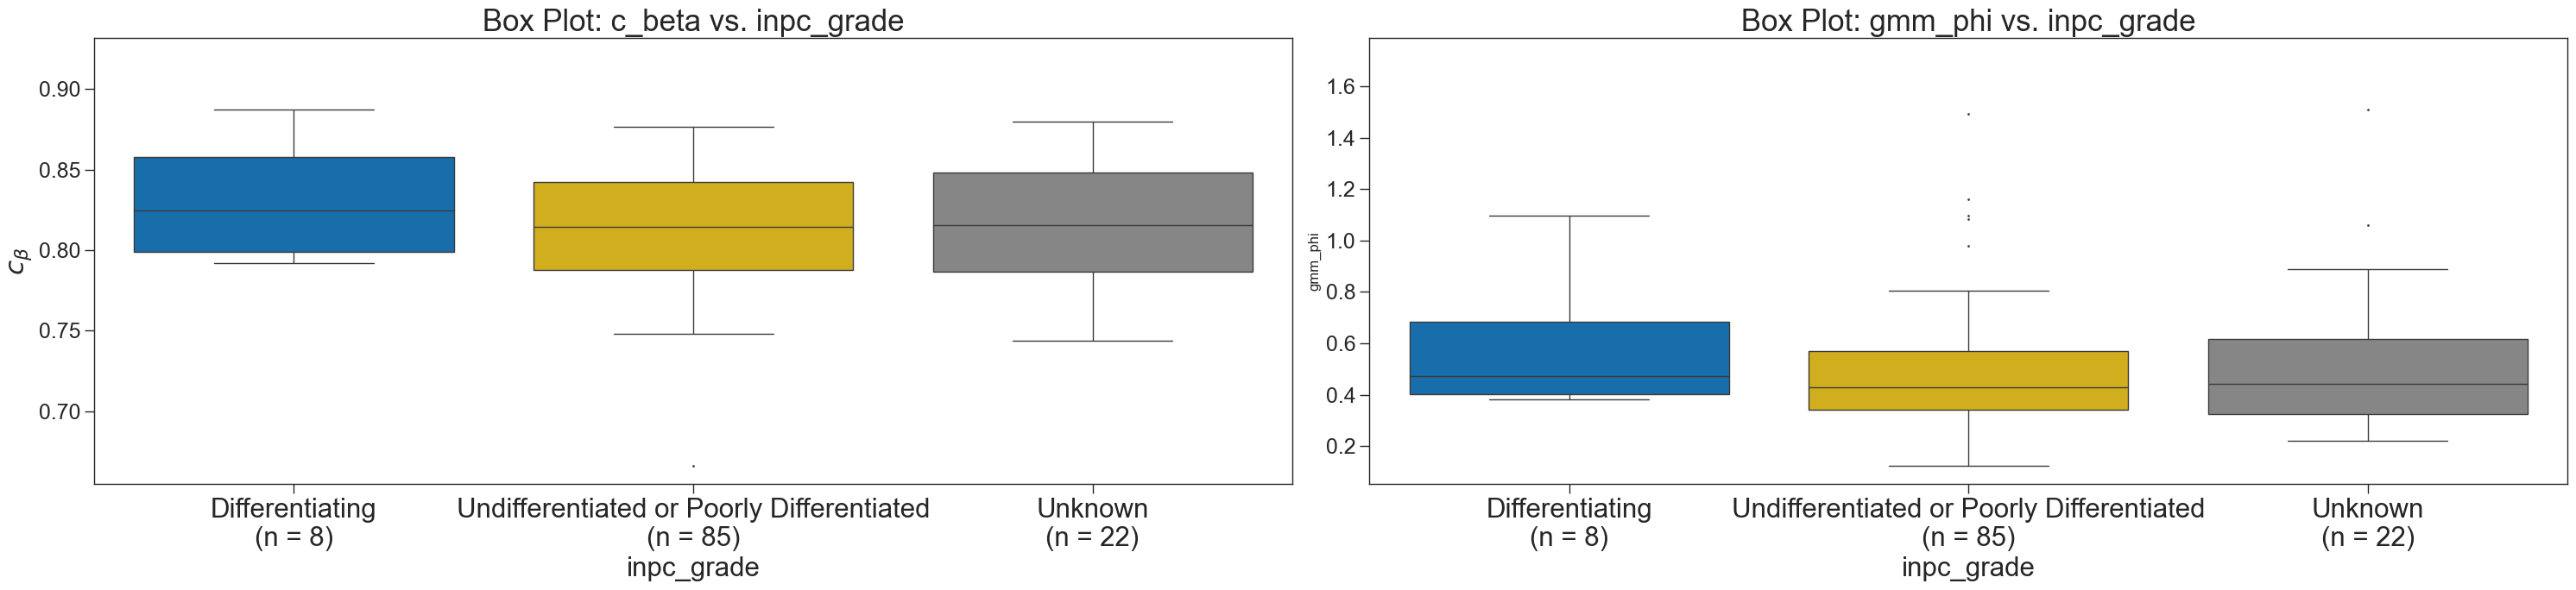

In [22]:
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(15 * 2, 7))  # Doubling width for side-by-side plots

# Left plot: c_beta vs. inpc_grade
nbl_util.saveBoxPlotNew(clinical, 'inpc_grade', restrict=False,
                       var_y='c_beta', outfile=False, title=False, signif_bar_heights=0.02,
                       palette=nbl_consts['palette_jco'], xlabel='inpc_grade',
                       figsize=np.array([15, 7]), labelfontsize=nbl_consts['labelfontsize'] * 0.9, 
                       ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, linewidth=nbl_consts['linewidth'], 
                       fliersize=nbl_consts['fliersize'], ax=axes[0])  # Assign subplot

axes[0].set_title("Box Plot: c_beta vs. inpc_grade", fontsize=nbl_consts['labelfontsize'])

# Right plot: gmm_phi vs. inpc_grade
nbl_util.saveBoxPlotNew(clinical, 'inpc_grade', restrict=False,
                       var_y='gmm_phi', outfile=False, title=False, signif_bar_heights=0.02,
                       palette=nbl_consts['palette_jco'], xlabel='inpc_grade',
                       figsize=np.array([15, 7]), labelfontsize=nbl_consts['labelfontsize'] * 0.9, 
                       ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, linewidth=nbl_consts['linewidth'], 
                       fliersize=nbl_consts['fliersize'], ax=axes[1])  # Assign subplot

axes[1].set_title("Box Plot: gmm_phi vs. inpc_grade", fontsize=nbl_consts['labelfontsize'])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns

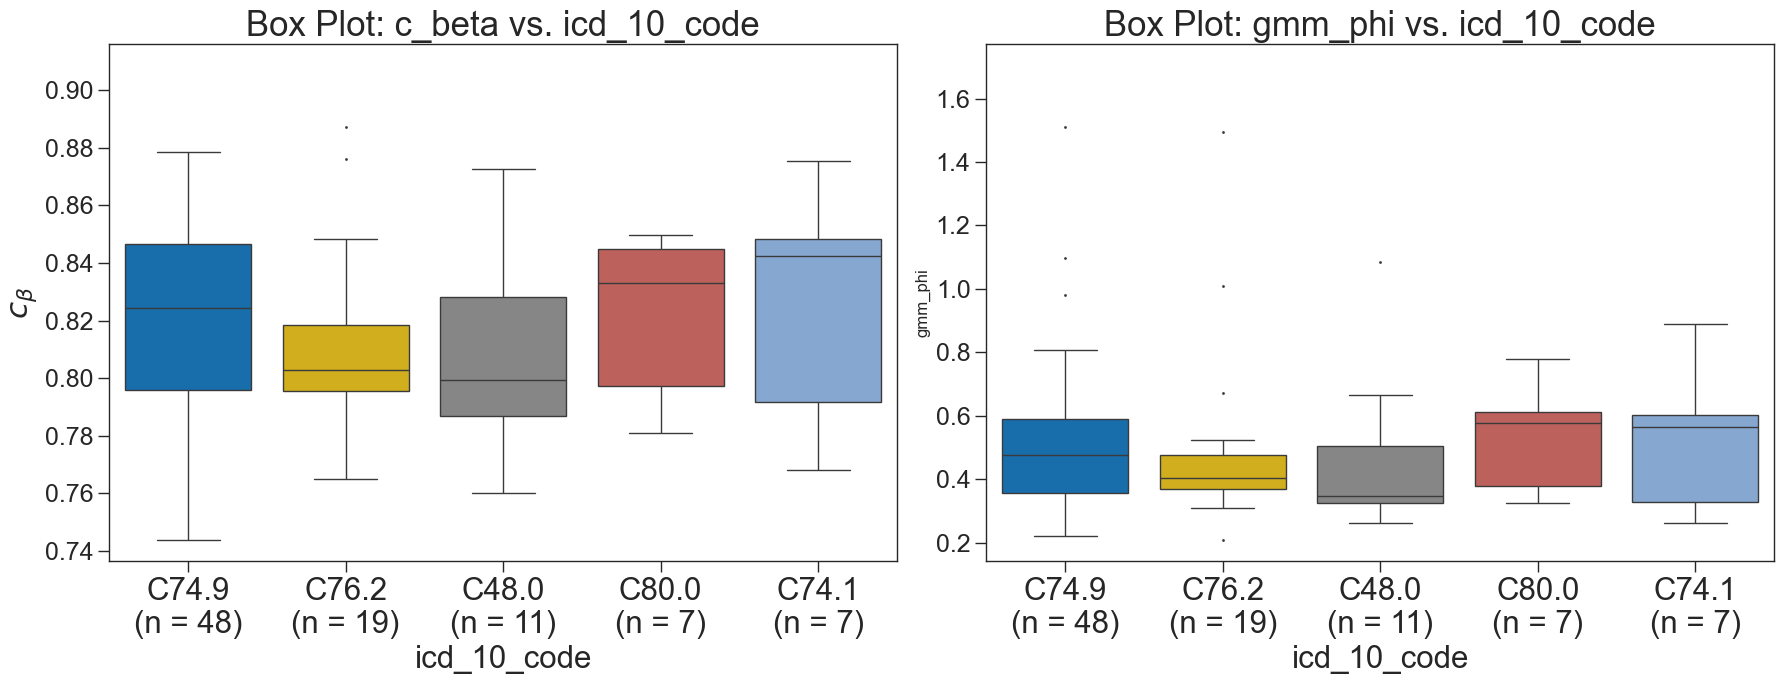

In [23]:
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(9 * 2, 7))  # Doubling width for side-by-side plots

# Define top 5 most common ICD-10 codes
top_icd_10_codes = clinical['icd_10_code'].value_counts().sort_values(ascending=False).index[:5].values

# Left plot: c_beta vs. icd_10_code
nbl_util.saveBoxPlotNew(clinical, 'icd_10_code', restrict=False,
                       var_y='c_beta', outfile=False, title=False, signif_bar_heights=0.02,
                       palette=nbl_consts['palette_jco'], xlabel='icd_10_code',
                       use_groups=top_icd_10_codes,
                       figsize=np.array([9, 7]), labelfontsize=nbl_consts['labelfontsize'] * 0.9, 
                       ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, linewidth=nbl_consts['linewidth'], 
                       fliersize=nbl_consts['fliersize'], ax=axes[0])  # Assign subplot

axes[0].set_title("Box Plot: c_beta vs. icd_10_code", fontsize=nbl_consts['labelfontsize'])

# Right plot: gmm_phi vs. icd_10_code
nbl_util.saveBoxPlotNew(clinical, 'icd_10_code', restrict=False,
                       var_y='gmm_phi', outfile=False, title=False, signif_bar_heights=0.02,
                       palette=nbl_consts['palette_jco'], xlabel='icd_10_code',
                       use_groups=top_icd_10_codes,
                       figsize=np.array([9, 7]), labelfontsize=nbl_consts['labelfontsize'] * 0.9, 
                       ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, linewidth=nbl_consts['linewidth'], 
                       fliersize=nbl_consts['fliersize'], ax=axes[1])  # Assign subplot

axes[1].set_title("Box Plot: gmm_phi vs. icd_10_code", fontsize=nbl_consts['labelfontsize'])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns

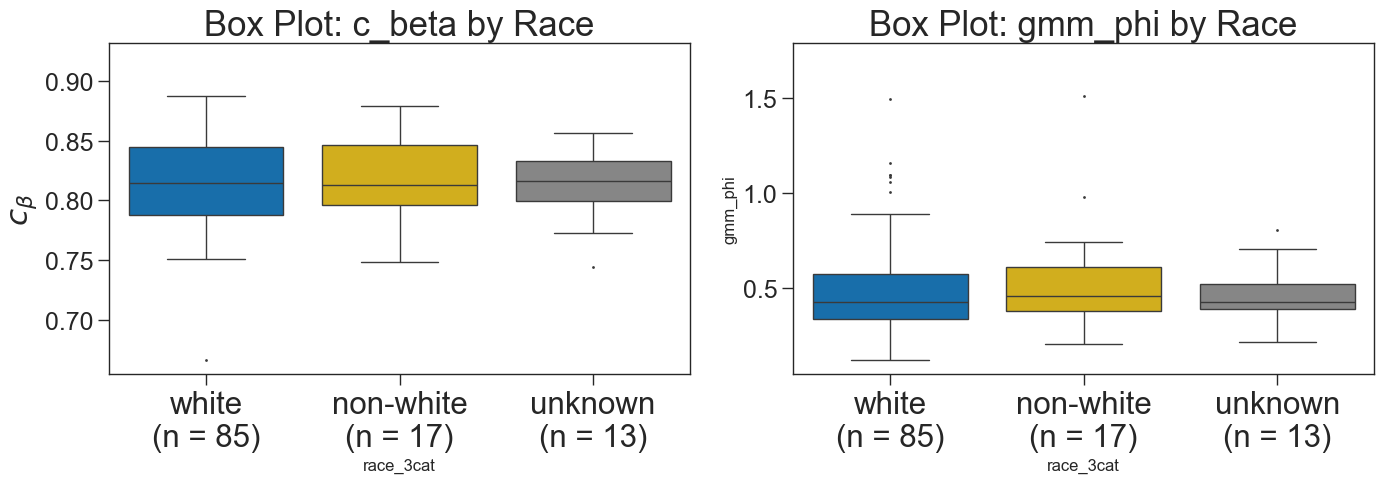

In [24]:
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(7 * 2, 5))  # Doubling width for side-by-side plots

# Function to categorize race into 3 categories
def map_race_to_3cat(race_value):
    """
    Convert each race entry into 'white', 'nonwhite', or 'unknown'.
    """
    if pd.isna(race_value) or str(race_value).lower() == 'unknown':
        return 'unknown'
    elif str(race_value).lower() == 'white':
        return 'white'
    else:
        return 'non-white'

# Apply mapping to 'race' column
clinical['race_3cat'] = clinical['race'].apply(map_race_to_3cat)

# Define category order
cat_order = ['white', 'non-white', 'unknown']
clinical['race_3cat'] = pd.Categorical(
    clinical['race_3cat'],
    categories=cat_order,
    ordered=True
)

# Left plot: c_beta vs. race_3cat
nbl_util.saveBoxPlotNew(
    sample_annotations = clinical,
    var_cat           = 'race_3cat',
    var_y             = 'c_beta',
    restrict          = False,
    use_groups        = cat_order,
    outdir            = '.',
    outfile           = False,
    title             = False,
    custom_title      = 'c_beta by Race',
    palette           = nbl_consts['palette_jco'],
    xlabel            = 'Race',
    figsize           = np.array([7, 5]),
    labelfontsize     = nbl_consts['labelfontsize'] * 0.9,
    ticksfontsize     = nbl_consts['ticksfontsize'],
    sf                = sf,
    linewidth         = nbl_consts['linewidth'],
    fliersize         = nbl_consts['fliersize'],
    ax                = axes[0]  # Assign subplot
)

axes[0].set_title("Box Plot: c_beta by Race", fontsize=nbl_consts['labelfontsize'])

# Right plot: gmm_phi vs. race_3cat
nbl_util.saveBoxPlotNew(
    sample_annotations = clinical,
    var_cat           = 'race_3cat',
    var_y             = 'gmm_phi',
    restrict          = False,
    use_groups        = cat_order,
    outdir            = '.',
    outfile           = False,
    title             = False,
    custom_title      = 'gmm_phi by Race',
    palette           = nbl_consts['palette_jco'],
    xlabel            = 'Race',
    figsize           = np.array([7, 5]),
    labelfontsize     = nbl_consts['labelfontsize'] * 0.9,
    ticksfontsize     = nbl_consts['ticksfontsize'],
    sf                = sf,
    linewidth         = nbl_consts['linewidth'],
    fliersize         = nbl_consts['fliersize'],
    ax                = axes[1]  # Assign subplot
)

axes[1].set_title("Box Plot: gmm_phi by Race", fontsize=nbl_consts['labelfontsize'])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns

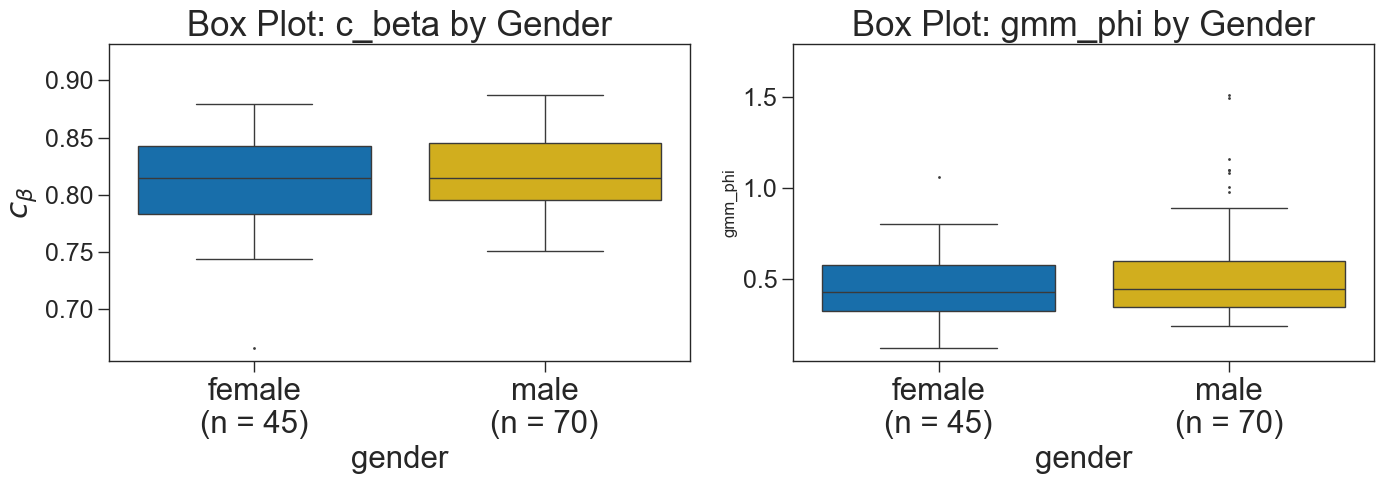

In [26]:
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(7 * 2, 5))  # Doubling width for side-by-side plots

# Left plot: c_beta vs. gender
nbl_util.saveBoxPlotNew(
    clinical, 'gender', restrict=False,
    var_y='c_beta', outfile=False, title=False, signif_bar_heights=0.02,
    palette=nbl_consts['palette_jco'], xlabel='gender',
    figsize=np.array([7, 5]), labelfontsize=nbl_consts['labelfontsize'] * 0.9, 
    ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, linewidth=nbl_consts['linewidth'], 
    fliersize=nbl_consts['fliersize'], ax=axes[0]  # Assign subplot
)

axes[0].set_title("Box Plot: c_beta by Gender", fontsize=nbl_consts['labelfontsize'])

# Right plot: gmm_phi vs. gender
nbl_util.saveBoxPlotNew(
    clinical, 'gender', restrict=False,
    var_y='gmm_phi', outfile=False, title=False, signif_bar_heights=0.02,
    palette=nbl_consts['palette_jco'], xlabel='gender',
    figsize=np.array([7, 5]), labelfontsize=nbl_consts['labelfontsize'] * 0.9, 
    ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, linewidth=nbl_consts['linewidth'], 
    fliersize=nbl_consts['fliersize'], ax=axes[1]  # Assign subplot
)

axes[1].set_title("Box Plot: gmm_phi by Gender", fontsize=nbl_consts['labelfontsize'])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns

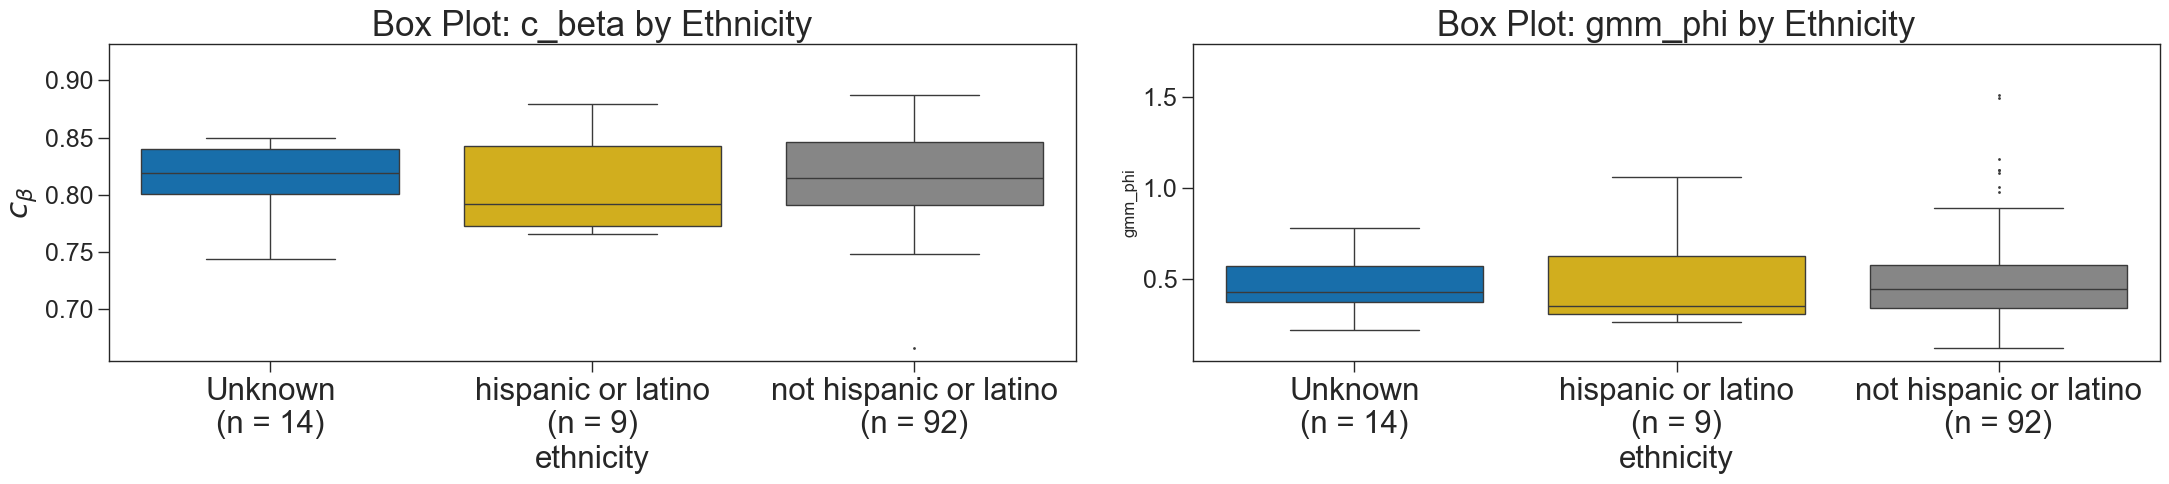

In [27]:
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(11 * 2, 5))  # Doubling width for side-by-side plots

# Left plot: c_beta vs. ethnicity
nbl_util.saveBoxPlotNew(
    clinical, 'ethnicity', restrict=False,
    var_y='c_beta', outfile=False, title=False, signif_bar_heights=0.02,
    palette=nbl_consts['palette_jco'], xlabel='ethnicity',
    figsize=np.array([11, 5]), labelfontsize=nbl_consts['labelfontsize'] * 0.9, 
    ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, linewidth=nbl_consts['linewidth'], 
    fliersize=nbl_consts['fliersize'], ax=axes[0]  # Assign subplot
)

axes[0].set_title("Box Plot: c_beta by Ethnicity", fontsize=nbl_consts['labelfontsize'])

# Right plot: gmm_phi vs. ethnicity
nbl_util.saveBoxPlotNew(
    clinical, 'ethnicity', restrict=False,
    var_y='gmm_phi', outfile=False, title=False, signif_bar_heights=0.02,
    palette=nbl_consts['palette_jco'], xlabel='ethnicity',
    figsize=np.array([11, 5]), labelfontsize=nbl_consts['labelfontsize'] * 0.9, 
    ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, linewidth=nbl_consts['linewidth'], 
    fliersize=nbl_consts['fliersize'], ax=axes[1]  # Assign subplot
)

axes[1].set_title("Box Plot: gmm_phi by Ethnicity", fontsize=nbl_consts['labelfontsize'])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns

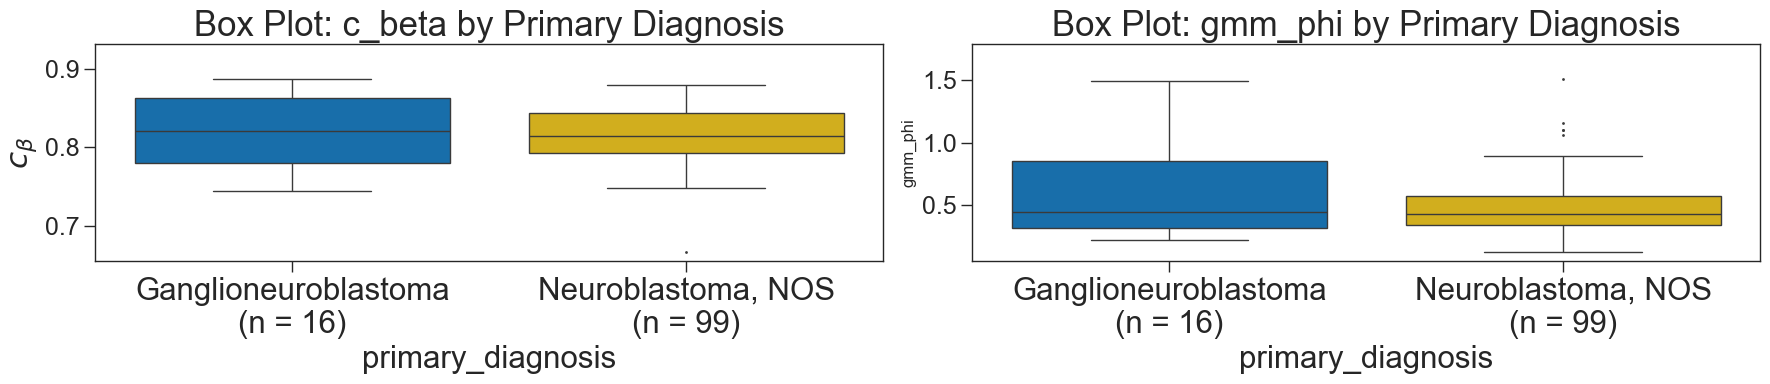

In [28]:
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(9 * 2, 4))  # Doubling width for side-by-side plots

# Left plot: c_beta vs. primary_diagnosis
nbl_util.saveBoxPlotNew(
    clinical, 'primary_diagnosis', restrict=False,
    var_y='c_beta', outfile=False, title=False, signif_bar_heights=0.02,
    palette=nbl_consts['palette_jco'], xlabel='primary_diagnosis',
    figsize=np.array([9, 4]), labelfontsize=nbl_consts['labelfontsize'] * 0.9, 
    ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, linewidth=nbl_consts['linewidth'], 
    fliersize=nbl_consts['fliersize'], ax=axes[0]  # Assign subplot
)

axes[0].set_title("Box Plot: c_beta by Primary Diagnosis", fontsize=nbl_consts['labelfontsize'])

# Right plot: gmm_phi vs. primary_diagnosis
nbl_util.saveBoxPlotNew(
    clinical, 'primary_diagnosis', restrict=False,
    var_y='gmm_phi', outfile=False, title=False, signif_bar_heights=0.02,
    palette=nbl_consts['palette_jco'], xlabel='primary_diagnosis',
    figsize=np.array([9, 4]), labelfontsize=nbl_consts['labelfontsize'] * 0.9, 
    ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, linewidth=nbl_consts['linewidth'], 
    fliersize=nbl_consts['fliersize'], ax=axes[1]  # Assign subplot
)

axes[1].set_title("Box Plot: gmm_phi by Primary Diagnosis", fontsize=nbl_consts['labelfontsize'])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns

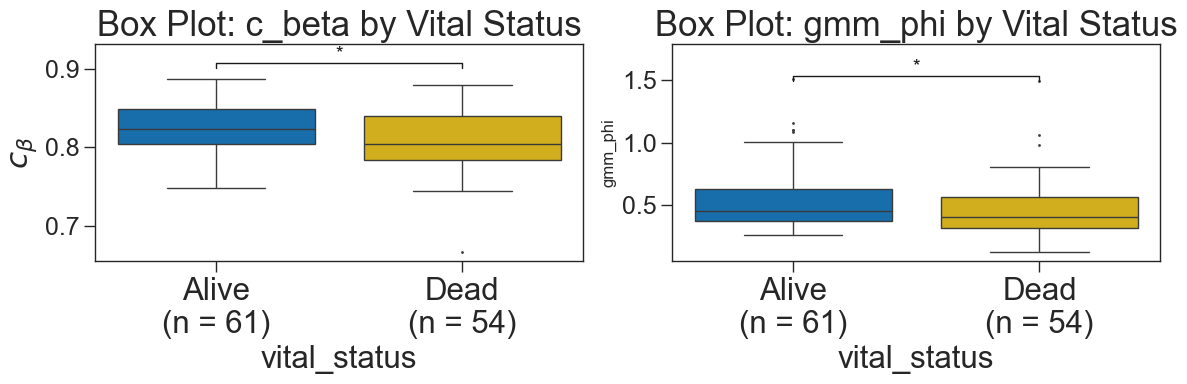

In [30]:
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(6 * 2, 4))  # Doubling width for side-by-side plots

# Left plot: c_beta vs. vital_status
nbl_util.saveBoxPlotNew(
    clinical, 'vital_status', restrict=False,
    var_y='c_beta', outfile=False, title=False, signif_bar_heights=0.02,
    palette=nbl_consts['palette_jco'], xlabel='vital_status',
    figsize=np.array([6, 4]), labelfontsize=nbl_consts['labelfontsize'] * 0.9, 
    ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, linewidth=nbl_consts['linewidth'], 
    fliersize=nbl_consts['fliersize'], ax=axes[0]  # Assign subplot
)

axes[0].set_title("Box Plot: c_beta by Vital Status", fontsize=nbl_consts['labelfontsize'])

# Right plot: gmm_phi vs. vital_status
nbl_util.saveBoxPlotNew(
    clinical, 'vital_status', restrict=False,
    var_y='gmm_phi', outfile=False, title=False, signif_bar_heights=0.02,
    palette=nbl_consts['palette_jco'], xlabel='vital_status',
    figsize=np.array([6, 4]), labelfontsize=nbl_consts['labelfontsize'] * 0.9, 
    ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, linewidth=nbl_consts['linewidth'], 
    fliersize=nbl_consts['fliersize'], ax=axes[1]  # Assign subplot
)

axes[1].set_title("Box Plot: gmm_phi by Vital Status", fontsize=nbl_consts['labelfontsize'])

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [31]:
nbl_util.getCorrelation(clinical, 'Age', 'c_beta')

LinregressResult(slope=np.float64(-20.012194113533667), intercept=np.float64(19.687854879730082), rvalue=np.float64(-0.23706551064594605), pvalue=np.float64(0.010743113063168908), stderr=np.float64(7.714842834618174), intercept_stderr=np.float64(6.302684506510017))

In [32]:
print(nbl_util.getCorrelation(clinical, 'Age', 'c_beta'))
print(nbl_util.getCorrelation(clinical, 'Age', 'c_beta', use_samples=clinical.index[clinical['Age'] < 7.5]))

LinregressResult(slope=np.float64(-20.012194113533667), intercept=np.float64(19.687854879730082), rvalue=np.float64(-0.23706551064594605), pvalue=np.float64(0.010743113063168908), stderr=np.float64(7.714842834618174), intercept_stderr=np.float64(6.302684506510017))
LinregressResult(slope=np.float64(-7.452810256383202), intercept=np.float64(8.82925714373185), rvalue=np.float64(-0.14801708524661072), pvalue=np.float64(0.12632058606753085), stderr=np.float64(4.8366526892012045), intercept_stderr=np.float64(3.9595587622840296))


In [33]:
clinical

,project,disease_type,primary_site,submitter_id.1,inss_stage,days_to_diagnosis,created_datetime,treatments,last_known_disease_status,tissue_or_organ_of_origin,...,c_beta,LUMP,Age,gmm_X,gmm_phi,psi_1_mean,psi_2_mean,psi_3_mean,psi_sub,race_3cat
submitter_id,,,,,,,,,,,,,,,,,,,,,
TARGET-30-PAIFXV,TARGET-NBL,Neuroepitheliomatous Neoplasms,Unknown,TARGET-30-PAIFXV,Stage 4,0.0,2016-04-25T16:33:09.408838-05:00,"c(\9341\"", \""9342\"", \""9047\"", \""P9462\"", \""93...",NaN,Unknown,...,0.849554,0.737149,5.490411,0.353410,0.616801,0.201507,0.446211,0.352282,0.150775,white
TARGET-30-PAISNS,TARGET-NBL,Neuroepitheliomatous Neoplasms,Unknown,TARGET-30-PAISNS,Stage 4,0.0,2016-04-25T16:33:19.670885-05:00,"c(\P9462\"", \""9047\""), c(\""2024-03-13T17:13:56...",NaN,Unknown,...,0.780827,0.843666,2.931507,0.238432,0.324116,0.228090,0.429734,0.342177,0.114087,white
TARGET-30-PAITCI,TARGET-NBL,Neuroepitheliomatous Neoplasms,Unknown,TARGET-30-PAITCI,Stage 4,0.0,2016-04-25T16:33:20.766209-05:00,"c(\9082\"", \""9047\""), c(\""2024-03-13T17:13:56....",NaN,Unknown,...,0.806653,0.828741,1.994521,0.286813,0.426599,0.220536,0.351632,0.427832,0.207296,white
TARGET-30-PAIVHE,TARGET-NBL,Neuroepitheliomatous Neoplasms,Adrenal gland,TARGET-30-PAIVHE,Stage 4,0.0,2016-04-25T16:33:24.712904-05:00,"c(\9047\"", \""P9462\"", \""ANBL0321\""), c(\""2024-...",NaN,"Adrenal gland, NOS",...,0.833854,0.802889,3.076712,0.316642,0.502432,0.183058,0.375171,0.441771,0.258713,white
TARGET-30-PAIVMJ,TARGET-NBL,Neuroepitheliomatous Neoplasms,Unknown,TARGET-30-PAIVMJ,Stage 1,0.0,2016-04-25T16:33:25.255816-05:00,"9047, 2024-03-13T17:13:56.180548-05:00, 93551d...",NaN,Unknown,...,0.844823,0.810102,0.553425,0.387515,0.780158,0.133737,0.546146,0.320117,0.186381,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TARGET-30-PATDXC,TARGET-NBL,Neuroepitheliomatous Neoplasms,Retroperitoneum and peritoneum,TARGET-30-PATDXC,Stage 4,0.0,2016-04-25T17:09:48.760969-05:00,"c(\ANBL0931\"", \""ANBL00B1\""), c(\""2024-03-13T1...",NaN,Retroperitoneum,...,0.845110,0.631937,4.545205,0.331997,0.549718,0.186876,0.520173,0.292951,0.106074,white
TARGET-30-PATEPF,TARGET-NBL,Neuroepitheliomatous Neoplasms,Adrenal gland,TARGET-30-PATEPF,Stage 4,0.0,2016-04-25T17:10:13.370406-05:00,"ANBL00B1, 2024-03-13T17:13:56.180548-05:00, 50...",NaN,"Adrenal gland, NOS",...,0.765816,0.772190,3.928767,0.222938,0.295313,0.262253,0.422339,0.315408,0.053155,white
TARGET-30-PATNKP,TARGET-NBL,Neuroepitheliomatous Neoplasms,Retroperitoneum and peritoneum,TARGET-30-PATNKP,Stage 4,0.0,2016-04-25T17:16:54.546442-05:00,"c(\ANBL0931\"", \""ADVL0912\"", \""ANBL0532\"", \""A...",NaN,Retroperitoneum,...,0.759995,0.882555,9.441096,0.220374,0.290687,0.252104,0.382823,0.365074,0.112970,white


<Axes: xlabel='Age', ylabel='Count'>

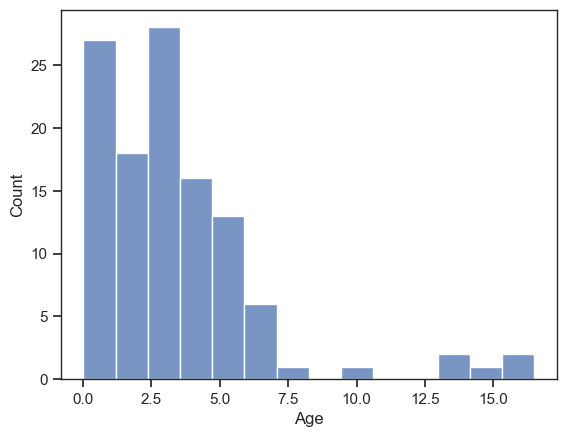

In [34]:
sns.histplot(clinical['Age'])

/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, data=plot_data, x=var_cat, y=var_y,
/Users/grahamgumbert/Documents/GitHub/EpiClockNBL/src/util.py:154: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns

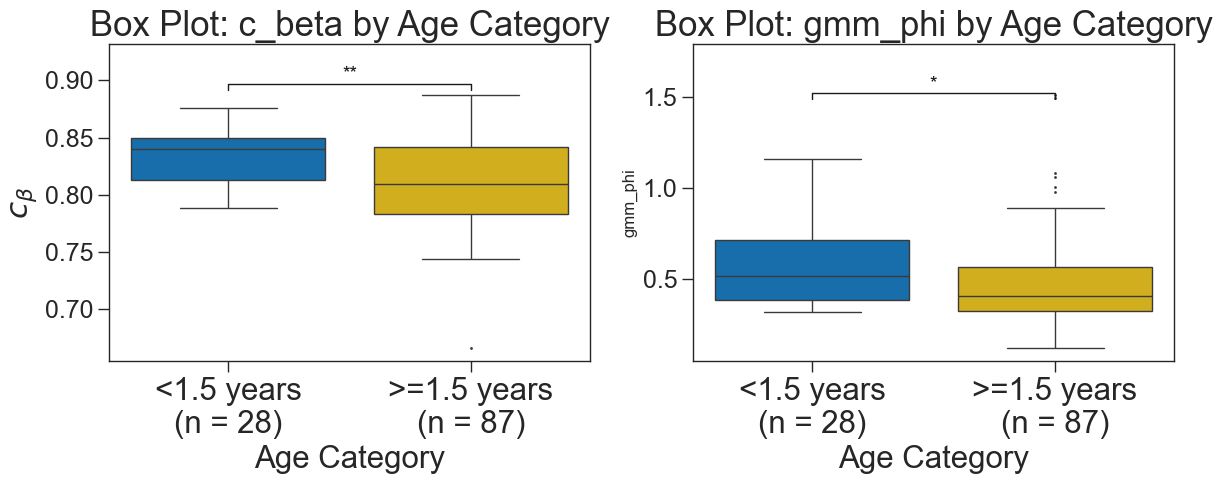

In [38]:
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(6 * 2, 5))  # Doubling width for side-by-side plots

# Define Age Category
clinical['Age Category'] = (clinical['Age'] >= 1.5).map({True: '>=1.5 years', False: '<1.5 years'})

# Left plot: c_beta vs. Age Category
nbl_util.saveBoxPlotNew(
    clinical, 'Age Category', restrict=False,
    var_y='c_beta', outfile=False, title=False, signif_bar_heights=0.01,
    palette=nbl_consts['palette_jco'], xlabel='Age Category',
    figsize=np.array([6, 5]), labelfontsize=nbl_consts['labelfontsize'] * 0.9, 
    ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, linewidth=nbl_consts['linewidth'], 
    fliersize=nbl_consts['fliersize'], ax=axes[0]  # Assign subplot
)

axes[0].set_title("Box Plot: c_beta by Age Category", fontsize=nbl_consts['labelfontsize'])

# Right plot: gmm_phi vs. Age Category
nbl_util.saveBoxPlotNew(
    clinical, 'Age Category', restrict=False,
    var_y='gmm_phi', outfile=False, title=False, signif_bar_heights=0.01,
    palette=nbl_consts['palette_jco'], xlabel='Age Category',
    figsize=np.array([6, 5]), labelfontsize=nbl_consts['labelfontsize'] * 0.9, 
    ticksfontsize=nbl_consts['ticksfontsize'], sf=sf, linewidth=nbl_consts['linewidth'], 
    fliersize=nbl_consts['fliersize'], ax=axes[1]  # Assign subplot
)

axes[1].set_title("Box Plot: gmm_phi by Age Category", fontsize=nbl_consts['labelfontsize'])

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [36]:
clinical.loc[clinical['vital_status'] == 'Dead'].iloc[0]

project                                                                     TARGET-NBL
disease_type                                            Neuroepitheliomatous Neoplasms
primary_site                                                                   Unknown
submitter_id.1                                                        TARGET-30-PAIFXV
inss_stage                                                                     Stage 4
days_to_diagnosis                                                                  0.0
created_datetime                                      2016-04-25T16:33:09.408838-05:00
treatments                           c(\9341\", \"9342\", \"9047\", \"P9462\", \"93...
last_known_disease_status                                                          NaN
tissue_or_organ_of_origin                                                      Unknown
days_to_last_follow_up                                                             NaN
age_at_diagnosis                           

# Beta values

In [88]:
beta_values_Clock = pd.read_table(os.path.join(proj_dir, 'NBL.methyl.traditional_sites.tsv'), index_col=0)

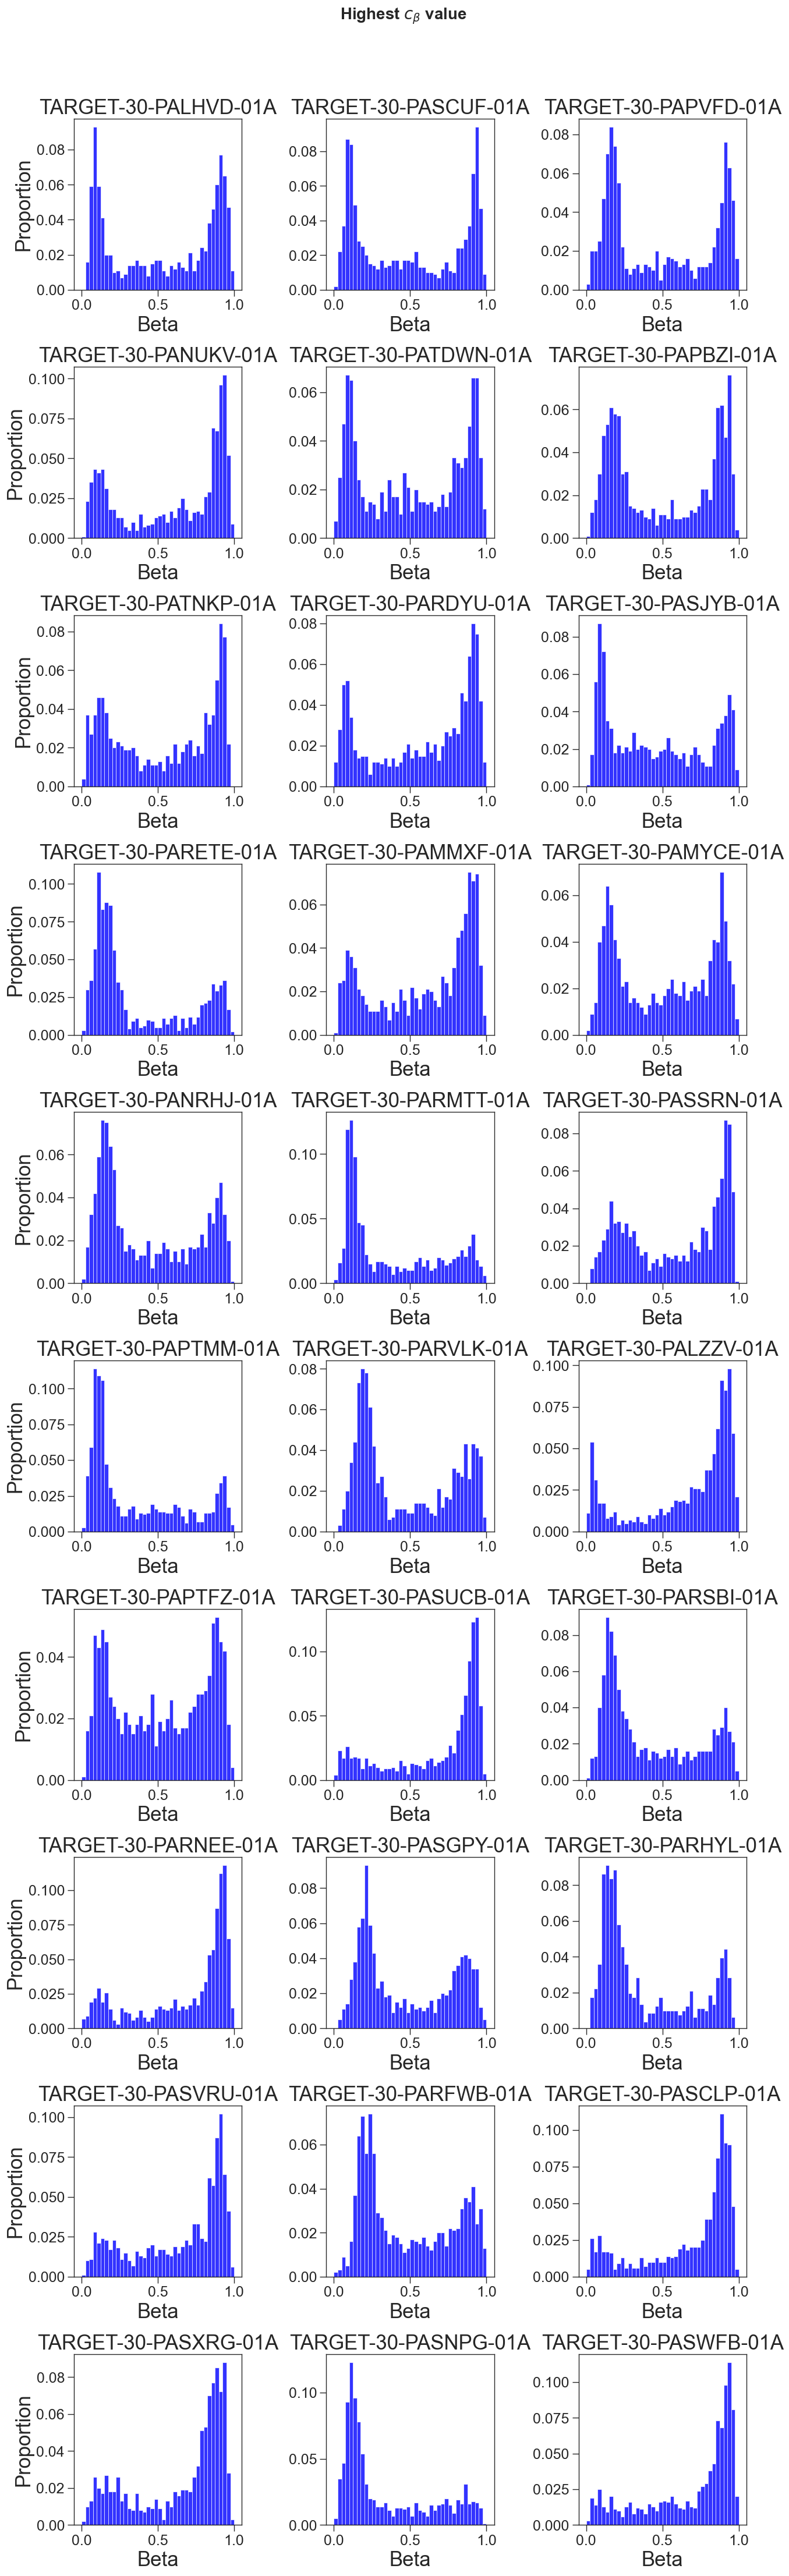

In [89]:
n_samps = 30

# Plot Clock beta values youngest tumors and save plot
youngest = c_beta.sort_values().index[:n_samps]
nbl_util.plotTumorWise(
    beta_values_Clock,
    data_obj = "beta_decomp",
    n_samps=n_samps, ncols=3,
    choose_random=False,
    sample_list=youngest,
    figsize=figsize * [2, 4.5/18 * n_samps], text_fontsize=nbl_consts['labelfontsize'], ticksfontsize=nbl_consts['ticksfontsize'], opacity=nbl_consts['opacity'], sf=1,
    tight_layout_pad=6, bins=40,
    suptitle='Highest $c_β$ value',
    outfile=True, outfile_name='NBL-youngest_tumors.pdf', outdir=figure_outdir
)

In [90]:
clinical.groupby('vital_status')['cog_neuroblastoma_risk_group'].value_counts().unstack()

cog_neuroblastoma_risk_group,High Risk,Intermediate Risk,Low Risk
vital_status,,,
Alive,46.0,9.0,22.0
Dead,73.0,1.0,NaN


In [91]:
clinical['Age']

submitter_id
TARGET-30-PASUCB    2.761644
TARGET-30-PASNPG    0.871233
TARGET-30-PARNEE    2.934247
TARGET-30-PALXTB    1.739726
TARGET-30-PAMMXF    4.550685
                      ...   
TARGET-30-PALVVH    0.600000
TARGET-30-PATYIL    0.898630
TARGET-30-PAPBGH    2.942466
TARGET-30-PAREGK    1.556164
TARGET-30-PAMZSH    0.863014
Name: Age, Length: 151, dtype: float64

In [92]:
clinical['Clock estimate'] = -np.log(1 - 2*clinical['c_beta']) / 2

/Users/grahamgumbert/myenv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [93]:
clinical['c_beta']

submitter_id
TARGET-30-PASUCB    0.700583
TARGET-30-PASNPG    0.709532
TARGET-30-PARNEE    0.701682
TARGET-30-PALXTB    0.807062
TARGET-30-PAMMXF    0.688997
                      ...   
TARGET-30-PALVVH    0.804176
TARGET-30-PATYIL    0.735402
TARGET-30-PAPBGH    0.735418
TARGET-30-PAREGK    0.788461
TARGET-30-PAMZSH    0.836455
Name: c_beta, Length: 151, dtype: float64

In [94]:
clinical['Clock estimate']

submitter_id
TARGET-30-PASUCB   NaN
TARGET-30-PASNPG   NaN
TARGET-30-PARNEE   NaN
TARGET-30-PALXTB   NaN
TARGET-30-PAMMXF   NaN
                    ..
TARGET-30-PALVVH   NaN
TARGET-30-PATYIL   NaN
TARGET-30-PAPBGH   NaN
TARGET-30-PAREGK   NaN
TARGET-30-PAMZSH   NaN
Name: Clock estimate, Length: 151, dtype: float64

(array([39., 50., 34., 17.,  4.,  2.,  0.,  2.,  1.,  2.]),
 array([-0.81039807,  0.85106956,  2.51253719,  4.17400482,  5.83547244,
         7.49694007,  9.1584077 , 10.81987533, 12.48134296, 14.14281058,
        15.80427821]),
 <BarContainer object of 10 artists>)

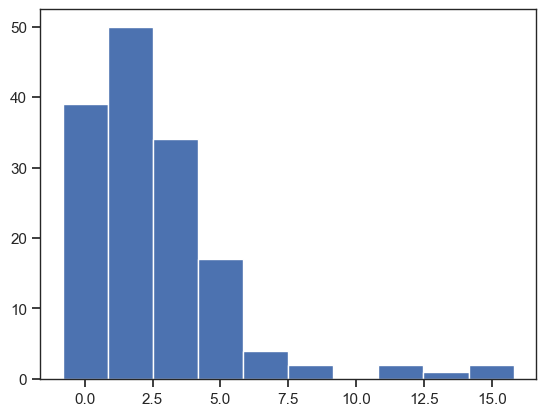

In [95]:
plt.hist(clinical['Age'] - clinical['c_beta'])

<Axes: xlabel='c_beta', ylabel='Age'>

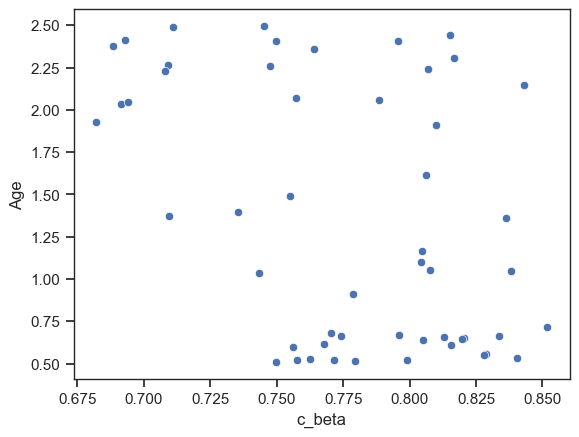

In [96]:
mask = clinical['Age'] < 2
sns.scatterplot(x=clinical.loc[mask, 'c_beta'], y=clinical.loc[mask, 'Age']+0.5)

In [97]:
mask.sum()

np.int64(52)